In [67]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [68]:
data = pd.read_csv('/content/kidney_disease.csv', index_col=0)

In [69]:
data.shape

(400, 25)

In [70]:
data

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,0.5,150.0,4.9,15.7,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,1.2,141.0,3.5,16.5,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,0.6,137.0,4.4,15.8,49,6600,5.4,no,no,no,good,no,no,notckd


In [78]:
columns_to_retain = ["sg", "al", "sc", "hemo",
                         "pcv", "wbcc", "rbcc", "htn", "classification"]
    #columns_to_retain = df.columns
data = data.drop(        [col for col in data.columns if not col in columns_to_retain], axis=1)
    # now drop the rows with na values
data = data.dropna(axis=0)

In [79]:
data

,sg,al,sc,hemo,pcv,htn,classification
id,,,,,,,
0,1.020,1.0,1.2,15.4,44,yes,ckd
1,1.020,4.0,0.8,11.3,38,no,ckd
2,1.010,2.0,1.8,9.6,31,no,ckd
3,1.005,4.0,3.8,11.2,32,yes,ckd
4,1.010,2.0,1.4,11.6,35,no,ckd
...,...,...,...,...,...,...,...
395,1.020,0.0,0.5,15.7,47,no,notckd
396,1.025,0.0,1.2,16.5,54,no,notckd
397,1.020,0.0,0.6,15.8,49,no,notckd


In [80]:
X = data.drop(["classification"], axis=1)
y = data["classification"]

In [81]:
X = X.replace(['yes'], 1)
X = X.replace(['no'], 0)

In [82]:
y = y.replace(['ckd'], 1)
y = y.replace(['notckd'], 0)

In [83]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=33)
N, D = X_train.shape

In [84]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [85]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(D,)),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [86]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [87]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500)

Epoch 1/500
7/7 [==============================] - 1s 34ms/step - loss: 0.3657 - accuracy: 0.8881 - val_loss: 0.3860 - val_accuracy: 0.8506
Epoch 2/500
7/7 [==============================] - 0s 10ms/step - loss: 0.3660 - accuracy: 0.8758 - val_loss: 0.3820 - val_accuracy: 0.8506
Epoch 3/500
7/7 [==============================] - 0s 9ms/step - loss: 0.3338 - accuracy: 0.8955 - val_loss: 0.3783 - val_accuracy: 0.8506
Epoch 4/500
7/7 [==============================] - 0s 11ms/step - loss: 0.3254 - accuracy: 0.9087 - val_loss: 0.3747 - val_accuracy: 0.8506
Epoch 5/500
7/7 [==============================] - 0s 10ms/step - loss: 0.3606 - accuracy: 0.8896 - val_loss: 0.3712 - val_accuracy: 0.8506
Epoch 6/500
7/7 [==============================] - 0s 10ms/step - loss: 0.3029 - accuracy: 0.9143 - val_loss: 0.3677 - val_accuracy: 0.8506
Epoch 7/500
7/7 [==============================] - 0s 9ms/step - loss: 0.3687 - accuracy: 0.8824 - val_loss: 0.3644 - val_accuracy: 0.8621
Epoch 8/500
7/7 [=====

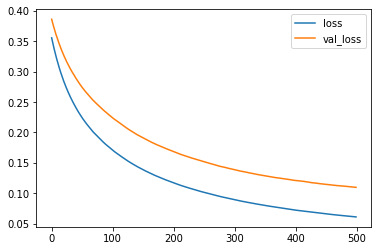

In [89]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

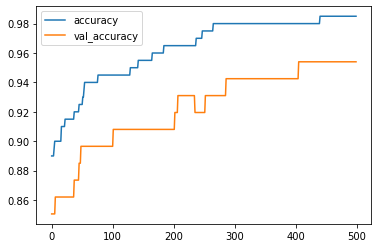

In [90]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [91]:
P = model.predict(X_test)
P = np.round(P).flatten()
print("Output:", model.evaluate(X_test, y_test))

3/3 [==============================] - 0s 4ms/step - loss: 0.1098 - accuracy: 0.9540
Output: [0.10984127223491669, 0.954023003578186]
